In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.io import ascii
from scipy.optimize import curve_fit

sns.set_context('poster')
sns.set_style("ticks")
sns.set_palette("colorblind")

def line(x,m,b):
    return (m*x) + b
    

def read_QDP(file):
#     Takes in a file and returns an array with the QDP data
    data = [[]]
    i = 0
    j = 0
    for line in file:
        if i >2:
            temp = line.split()
            if temp[0] != 'NO':
                if temp[-1]=='NO':
                    temp = temp[:-1]
                data[-1].append(temp)
            else:
                data.append([])
        i += 1
    for i in range(len(data)):
        data[i] = np.array(data[i]).astype(float).T
    return data

# file_sim = open('/Volumes/LaCie/AstroData/Circinus_ULX5/simultaneous_obs/const_unfolded.qdp', 'r')
# file_pl = open('/Volumes/LaCie/AstroData/Circinus_ULX5/xmm/0780950201/products/const_unfolded.qdp', 'r')
# file_high = open('/Volumes/LaCie/AstroData/Circinus_ULX5/xmm/0824450301/0824450301_products/const_unfolded.qdp', 'r')
# file_70ks = open('/Volumes/LaCie/AstroData/Circinus_ULX5/xmm/0792382701/products/sim70ks.qdp', 'r')

# data_sim = read_QDP(file_sim)
# data_pl = read_QDP(file_pl)
# data_high = read_QDP(file_high)
# sim70ks = read_QDP(file_70ks)

In [11]:
# print(data_sim)
# print(data_pl)
print(data_high)
# print(sim100ks)

[array([[3.19655001e-01, 3.45867485e-01, 3.66764992e-01, ...,
        9.65999985e+00, 9.81749916e+00, 9.93999958e+00],
       [1.57489926e-02, 1.04635060e-02, 1.04340017e-02, ...,
        7.49998093e-02, 8.24999809e-02, 3.99999619e-02],
       [4.08423693e-06, 5.53973587e-06, 6.52208746e-06, ...,
        1.10063166e-03, 1.02528511e-03, 1.06044894e-03],
       [6.54322093e-07, 9.21100252e-07, 9.91643560e-07, ...,
        1.84308141e-04, 1.80944073e-04, 2.87020812e-04],
       [6.79106461e-06, 7.96255063e-06, 8.95477206e-06, ...,
        6.21667923e-03, 6.42098300e-03, 6.58257911e-03]])]


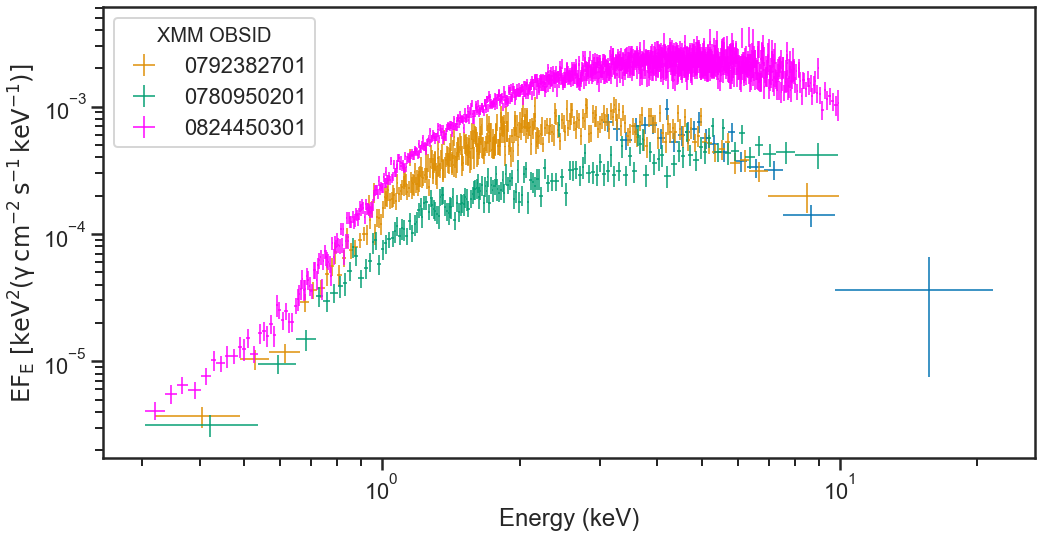

In [36]:
# When plotting QDP, the 0th column is X, 1st is X error, 2nd is Y, 3rd is Y error, and 4th is the model
plt.figure(figsize=(15,8))
lw = 1.5
# ls = 'steps'
ls=''
for i in range(len(data_sim)):
    if not i:
        plt.errorbar(data_sim[i][0],data_sim[i][2], xerr=data_sim[i][1], yerr=data_sim[i][3], \
                     ls=ls, color='C' + str(i), lw=lw)
    else:
        plt.errorbar(data_sim[i][0],data_sim[i][2], xerr=data_sim[i][1], yerr=data_sim[i][3], \
                     ls=ls, color='C' + str(i), lw=lw, label='0792382701')

for i in range(len(data_pl)):
    plt.errorbar(data_pl[i][0],data_pl[i][2], xerr=data_pl[i][1], yerr=data_pl[i][3], \
                 ls =ls, color='C' + str(int(len(data_sim) + i)), lw=lw, label='0780950201')

for i in range(len(data_high)):
    plt.errorbar(data_high[i][0],data_high[i][2], xerr=data_high[i][1], yerr=data_high[i][3], \
                 ls =ls, color='magenta', lw=lw, label='0824450301')
    
plt.legend(title='XMM OBSID', title_fontsize=20)
plt.loglog()
plt.xlabel('Energy (keV)')
plt.ylabel(r'$\mathrm{EF_E\ [keV^{2}(\gamma\,cm^{-2}\,s^{-1}\,keV^{-1})]}$')
plt.tight_layout()
plt.savefig('/Users/sean/Desktop/CircinusULX5/spectral_var.pdf')



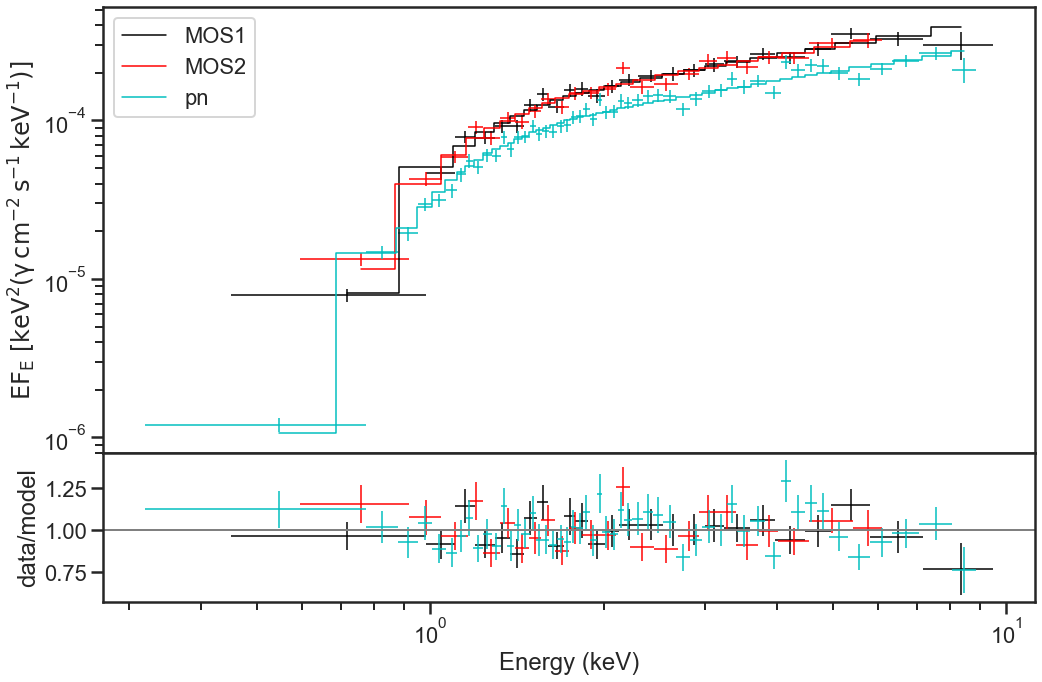

In [6]:
colors = ['black', 'red', 'c']
labels =['MOS1', 'MOS2', 'pn']
ls=''
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True,  gridspec_kw = {'height_ratios':[3, 1], 'hspace':0}, figsize=(15, 10))
for i in range(3):
    ax1.errorbar(sim70ks[i][0],sim70ks[i][2], xerr=sim70ks[i][1], yerr=sim70ks[i][3], \
                 ls =ls, color=colors[i], lw=1.5)
    ax1.plot(sim70ks[i][0],sim70ks[i][4], drawstyle = 'steps-mid', color = colors[i], lw=1.5, label=labels[i])
    ax2.errorbar(sim70ks[i+3][0],sim70ks[i+3][2], xerr=sim70ks[i+3][1], yerr=sim70ks[i+3][3],\
                ls=ls, color=colors[i], lw=1.5)
ax2.axhline(y=1, lw =2.0, color='grey')
ax2.set_ylabel('data/model')
ax2.set_xlabel('Energy (keV)')
ax1.set_ylabel(r'$\mathrm{EF_E\ [keV^2(\gamma\,cm^{-2}\,s^{-1}\,keV^{-1})}]$')
ax1.legend()
ax1.loglog()
plt.tight_layout()
plt.savefig('/Users/sean/Desktop/CircinusULX5/sim_spec.pdf')


# L-T plot

In [2]:
simpl_data = ascii.read('/Users/sean/Desktop/CircinusULX5/CircinusULX5_xrt/disk_F_T_simpl-Table 1.csv')
simpl_data 

Instrument,OBSID,Log disk Flux (0.1-50 keV),Flux +,Flux -,kTin,kTin +,kTin -
str10,str22,float64,float64,float64,float64,float64,float64
XMM/NuSTAR,0792382701/90201034002,-11.6395,0.019917,0.0147031,0.843623,0.042979,0.0284869
XMM,0780950201,-12.08,0.0435095,0.0422916,0.229448,0.0412562,0.0417861
XMM,0824450301,-11.1661,0.0366951,0.00407639,1.52394,0.133614,0.0131862
XMM/NuSTAR,0701981001/30002038004,-11.135,0.0341622,0.00552872,1.56927,0.134085,0.0205804
XMM,0111240101,-11.7884,0.0462405,0.00486543,0.582263,0.0757678,0.0312285
NuSTAR,30002038006,-11.1914,0.0293986,0.0531592,1.46836,0.188523,0.197153


In [3]:
popt, pcov = curve_fit(line, np.log10(simpl_data['kTin']), simpl_data['Log disk Flux (0.1-50 keV)'])
popt, pcov

(array([  1.16768689, -11.4217246 ]), array([[0.01847092, 0.00123925],
        [0.00123925, 0.00175152]]))

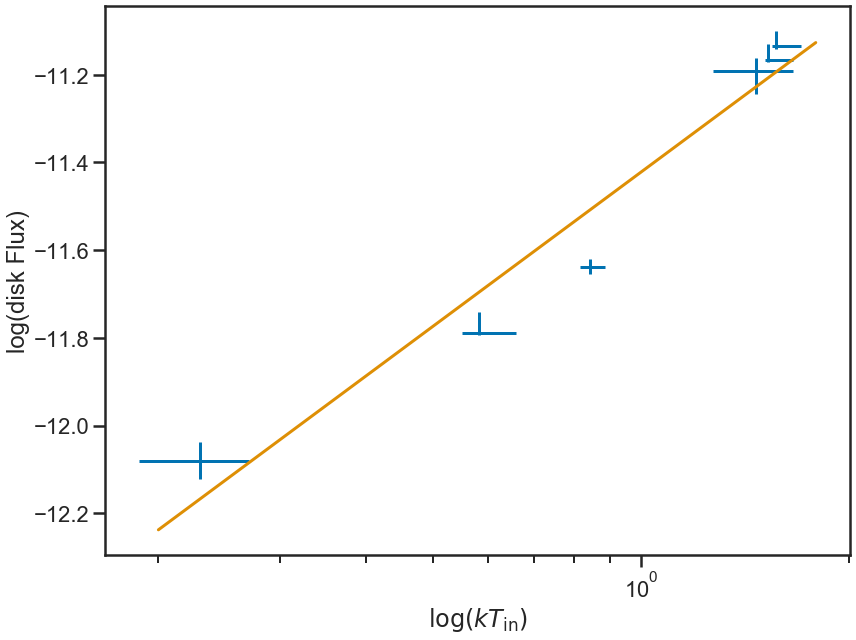

In [10]:
plt.figure(figsize=(12,9))
plt.errorbar(simpl_data['kTin'], simpl_data['Log disk Flux (0.1-50 keV)'], xerr=[simpl_data['kTin -'], simpl_data['kTin +']], \
             yerr=[simpl_data['Flux -'], simpl_data['Flux +']], fmt='none')
plt.plot(np.arange(0.2, 1.8, 0.01), line(np.log10(np.arange(0.2, 1.8, 0.01)), *popt))
plt.ylabel('log(disk Flux)')
plt.xlabel(r'$\mathrm{log}(kT_{\mathrm{in}})$')
plt.xscale('log')
plt.tight_layout()
plt.savefig('/Users/sean/Desktop/CircinusULX5/diskbb_simpl_kTin_flux.pdf')
# plt.show()

In [6]:
pl_data = ascii.read('/Users/sean/Desktop/CircinusULX5/CircinusULX5_xrt/disk_F_T_cutoffpl-Table 1.csv')
pl_data

Instrument,OBSID,Log disk Flux (0.1-50 keV),Flux +,Flux -,kTin,kTin +,kTin -
str10,str22,float64,float64,float64,float64,float64,float64
XMM/NuSTAR,0792382701/90201034002,-11.7987,0.0995655,0.0964411,1.14535,0.0724966,0.100548
XMM,0780950201,-12.209,0.0804824,0.122634,0.312579,0.0555483,0.0505987
XMM,0824450301,-11.1356,0.014491,0.103988,1.81131,0.120017,0.0521889
XMM/NuSTAR,0701981001/30002038004,-11.1723,0.0437469,0.0859711,1.79426,0.080586,0.109912
XMM,0111240101,-12.0005,0.292323,0.155704,0.684643,0.146456,0.0886742
NuSTAR,30002038006,-11.2372,0.123741,0.308731,1.54913,0.127293,0.252162


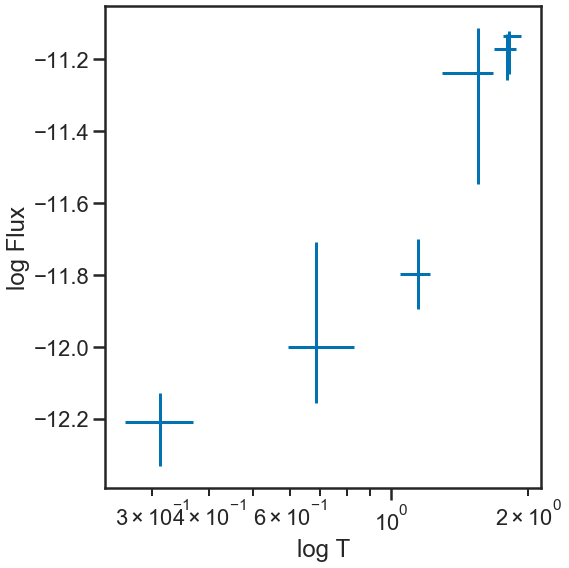

In [7]:
plt.figure(figsize=(8,8))
plt.errorbar(pl_data['kTin'], pl_data['Log disk Flux (0.1-50 keV)'], xerr=[pl_data['kTin -'], pl_data['kTin +']], \
             yerr=[pl_data['Flux -'], pl_data['Flux +']], fmt='none')
plt.ylabel('log Flux')
plt.xlabel('log T')
plt.xscale('log')
plt.tight_layout()
plt.show()